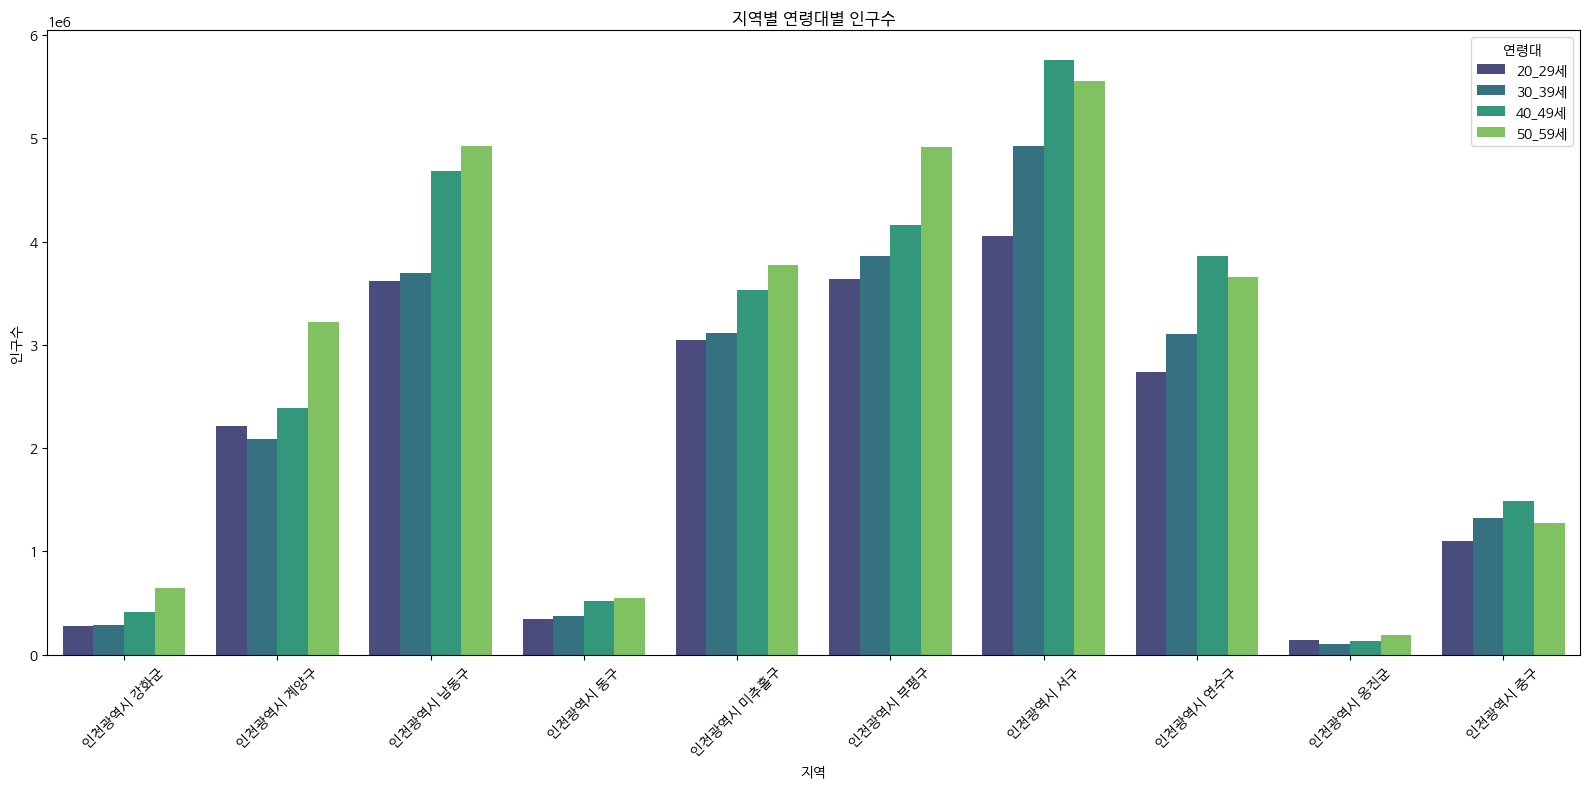

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns

# 폰트 설정 (윈도우 기준)
font_location = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 데이터 불러오기
file_path = "C:/Users/user/Desktop/병합 데이터/인천e음_통합_월별 (1).csv"  # 실제 파일 경로
df = pd.read_csv(file_path, encoding='utf-8')

# 성별 연령대 합치기
df['20_29세'] = df[['남/20_29', '여/20_29']].sum(axis=1)
df['30_39세'] = df[['남/30_39', '여/30_39']].sum(axis=1)
df['40_49세'] = df[['남/40_49', '여/40_49']].sum(axis=1)
df['50_59세'] = df[['남/50_59', '여/50_59']].sum(axis=1)

# '지역' 컬럼에서 '인천광역시' 값 제거
df = df[df['지역'] != '인천광역시']

# 지역별 연령대별 인구수 집계
grouped_totals = df.groupby('지역')[['20_29세', '30_39세', '40_49세', '50_59세']].sum().reset_index()

# 시각화
plt.figure(figsize=(16, 8))
sns.barplot(data=grouped_totals.melt(id_vars='지역', var_name='연령대', value_name='인구수'), 
            x='지역', y='인구수', hue='연령대', palette='viridis')
plt.title('지역별 연령대별 인구수')
plt.xlabel('지역')
plt.ylabel('인구수')
plt.xticks(rotation=45)
plt.legend(title='연령대')
plt.tight_layout()
plt.show()

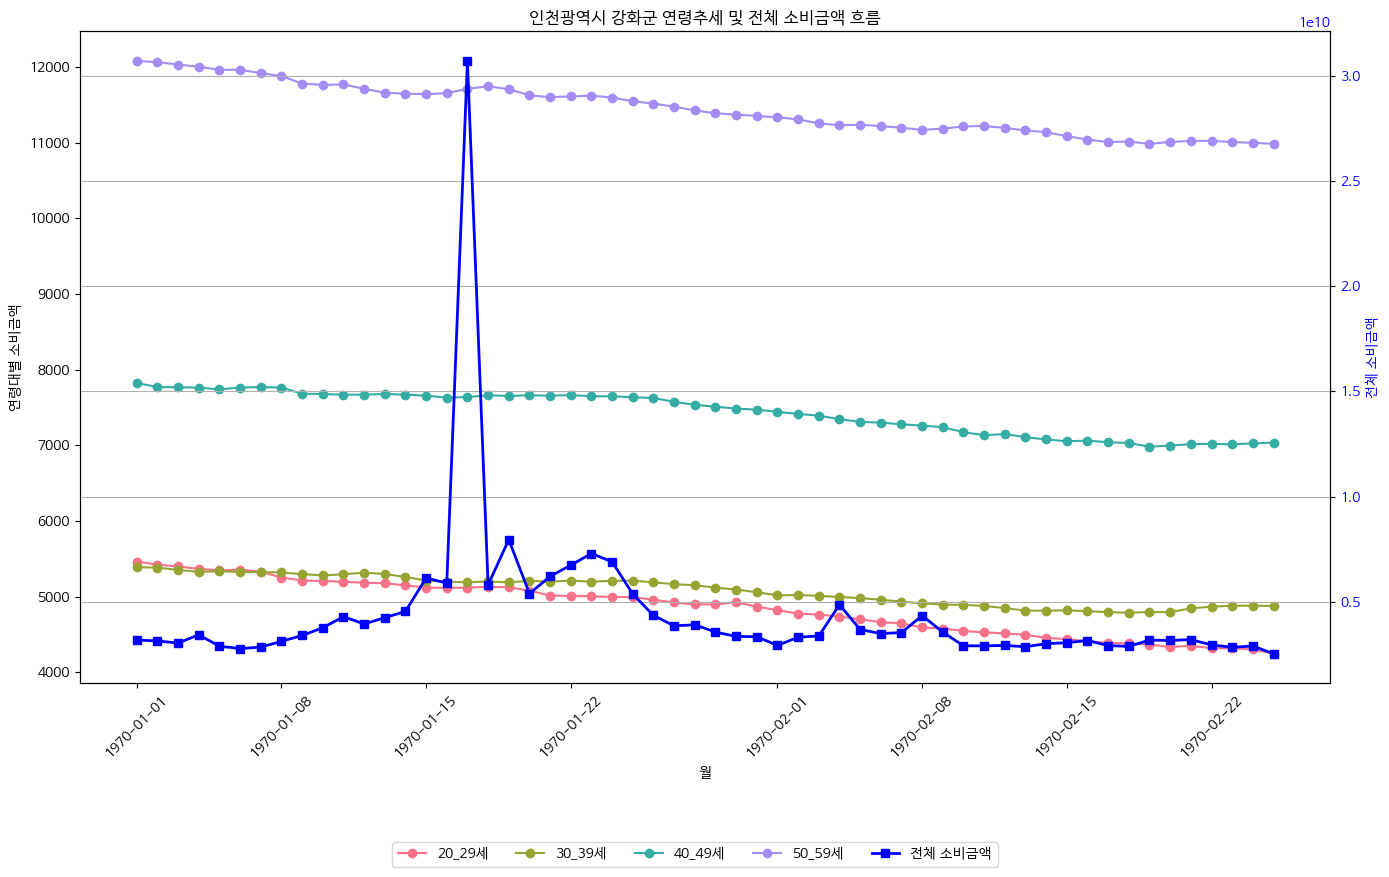

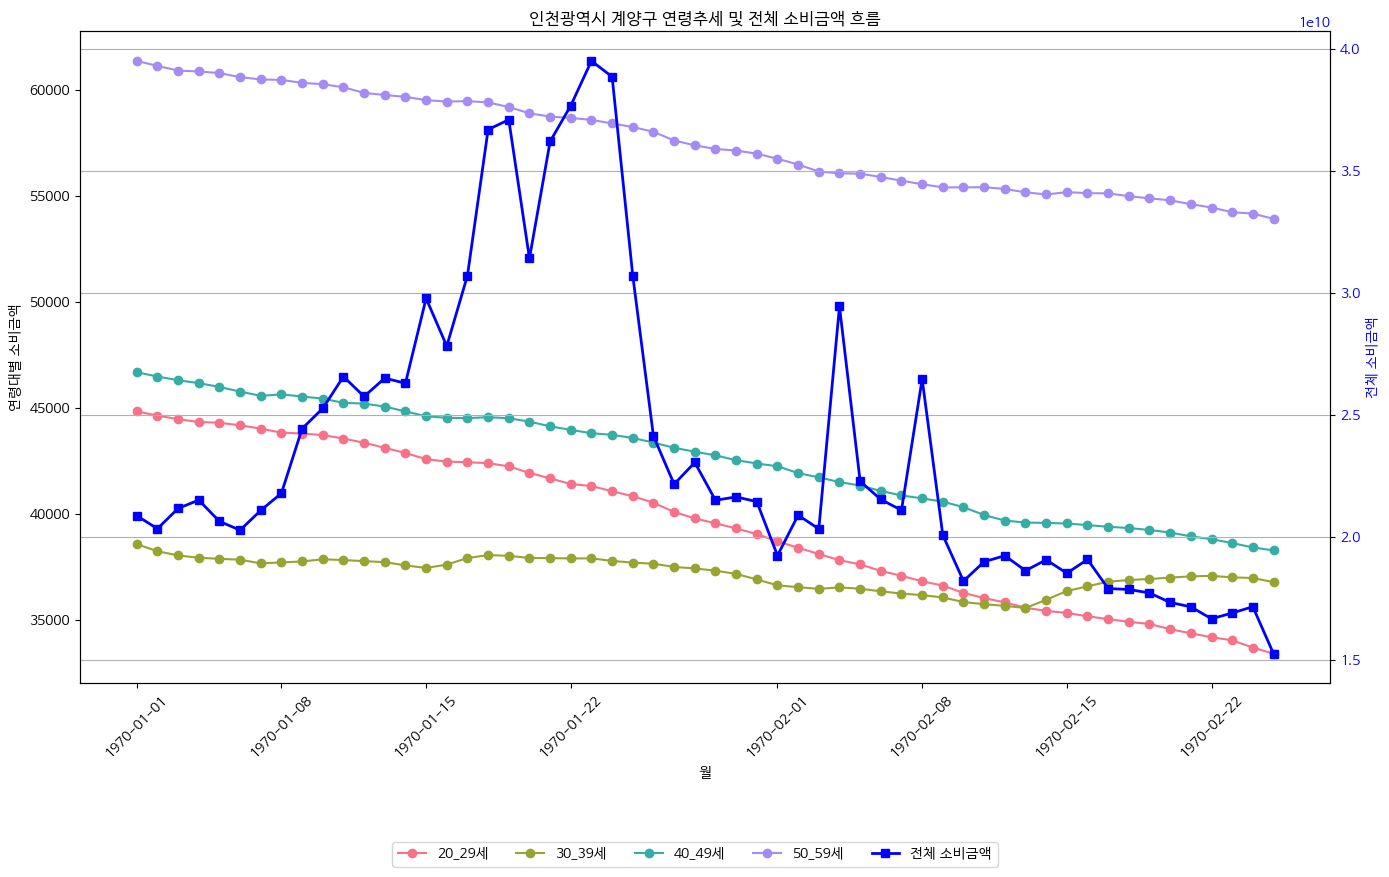

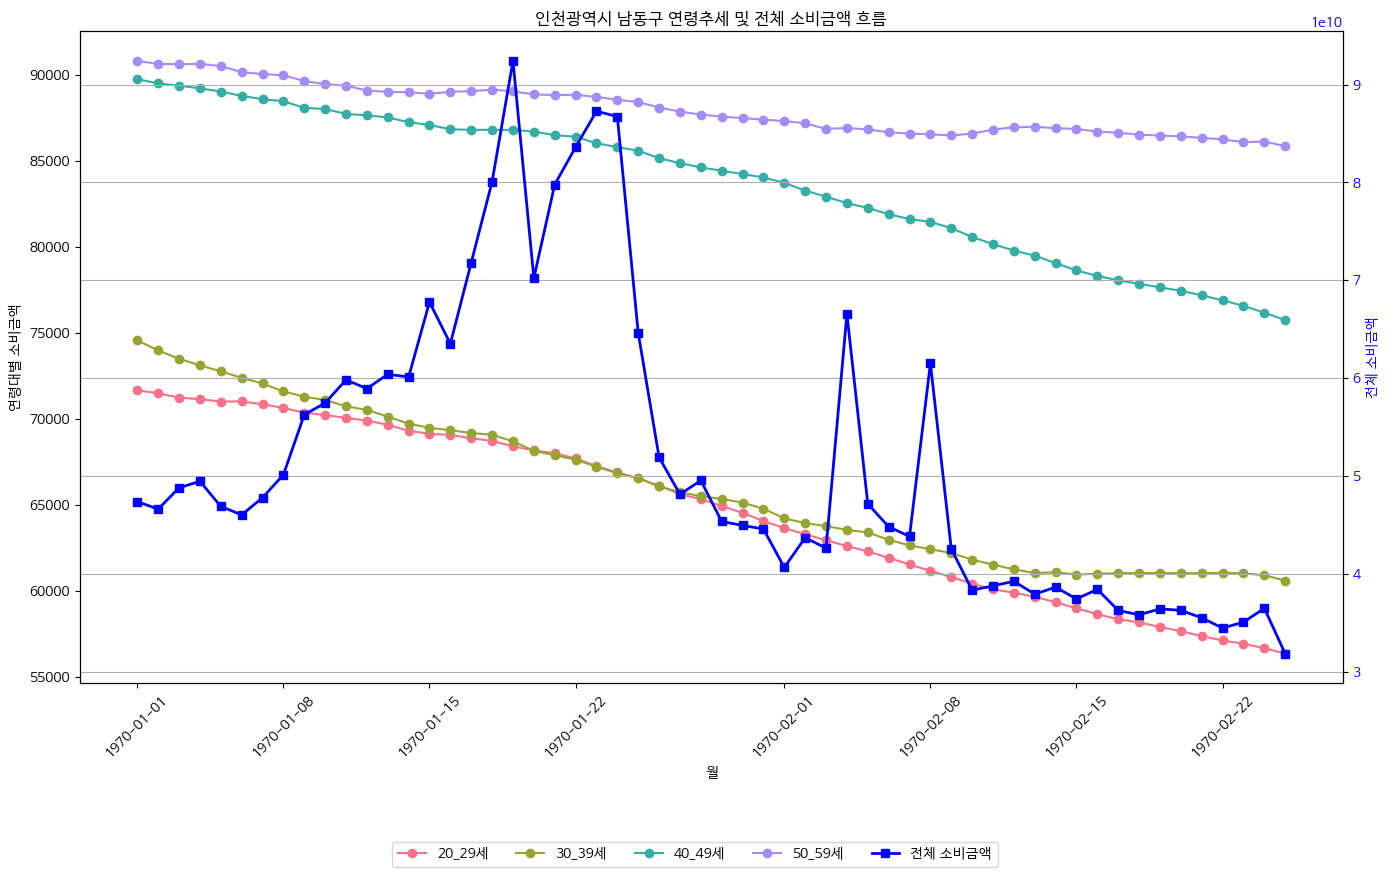

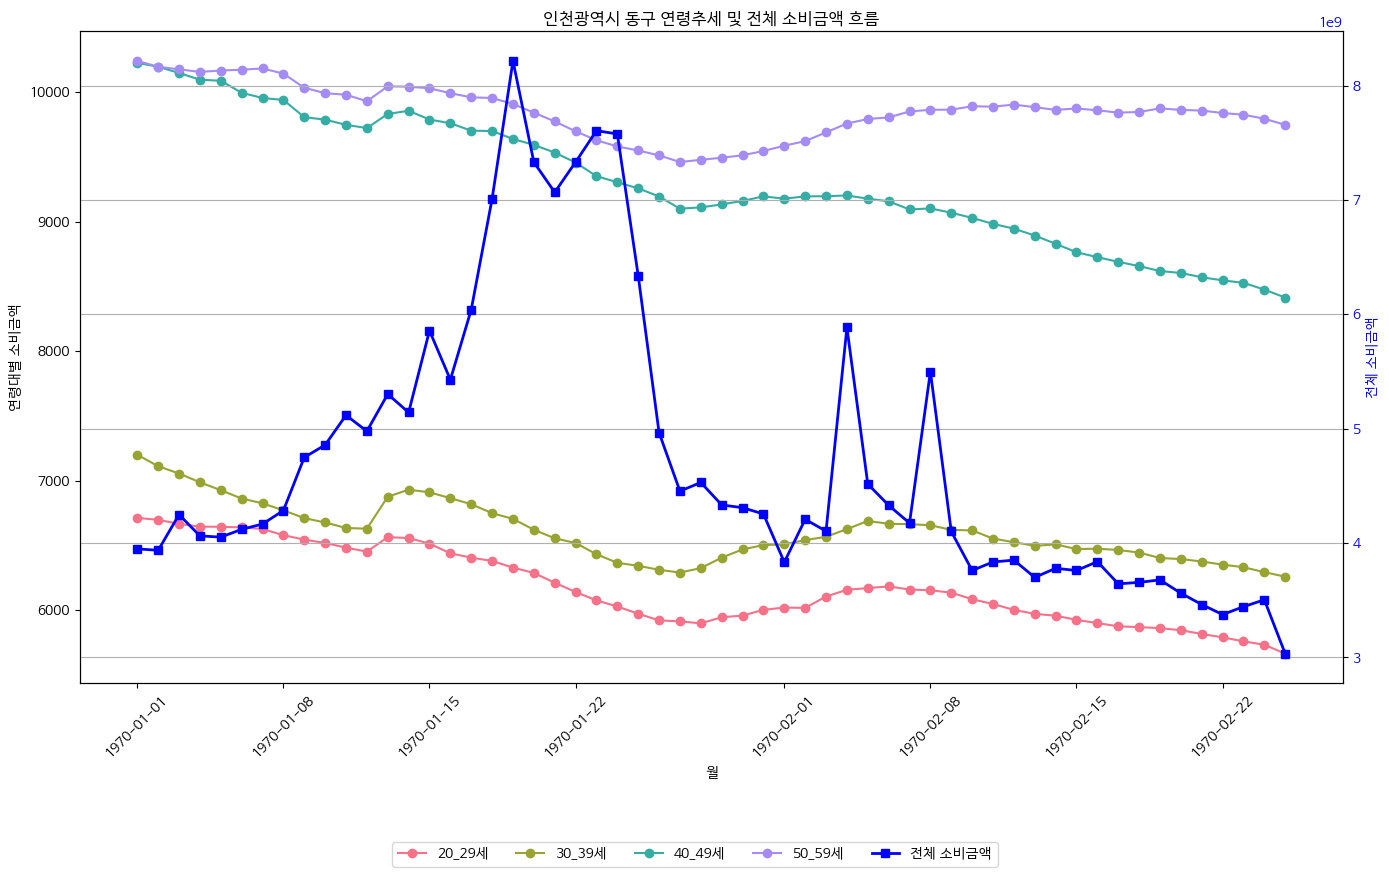

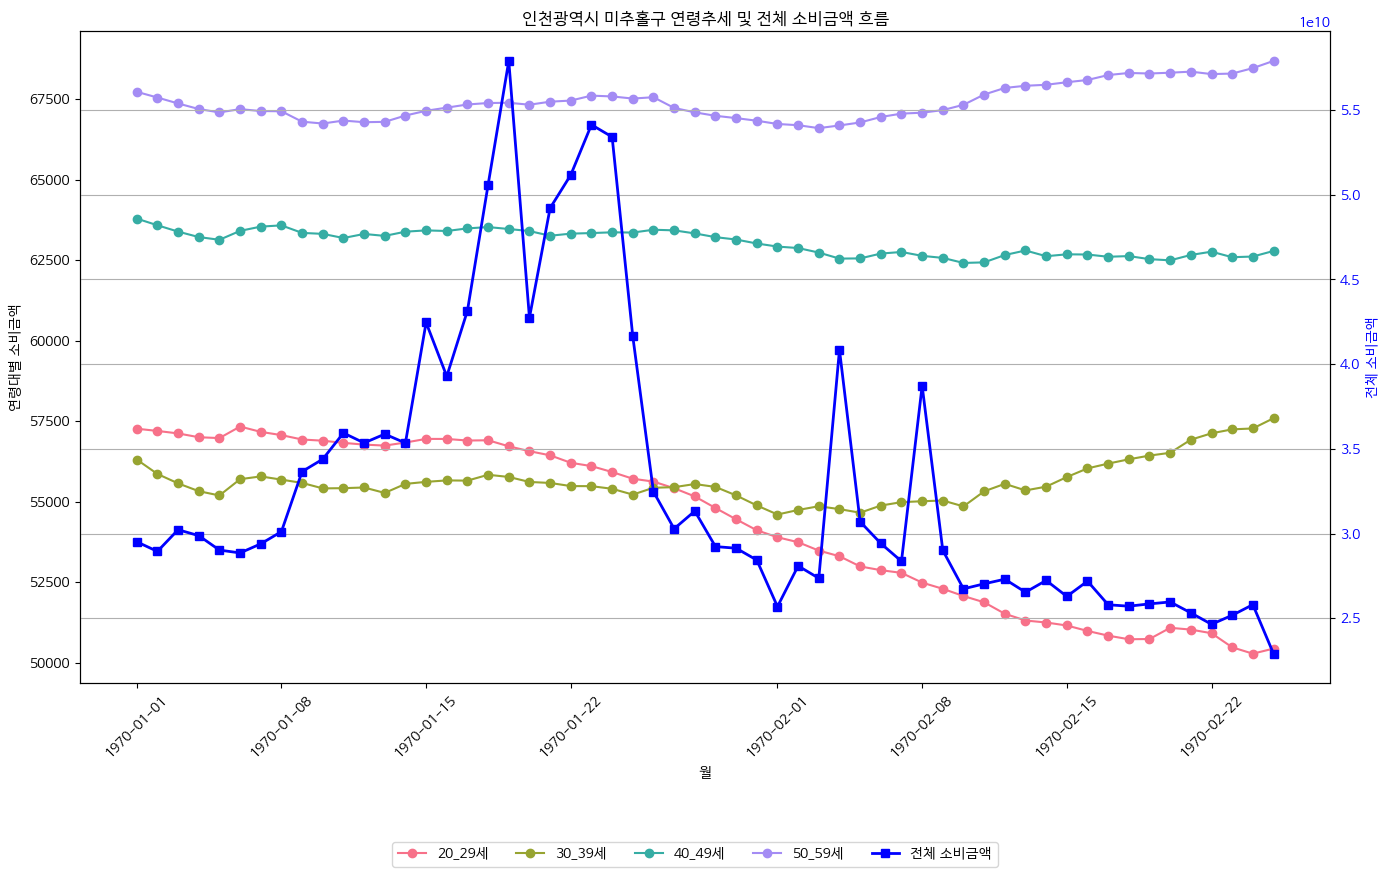

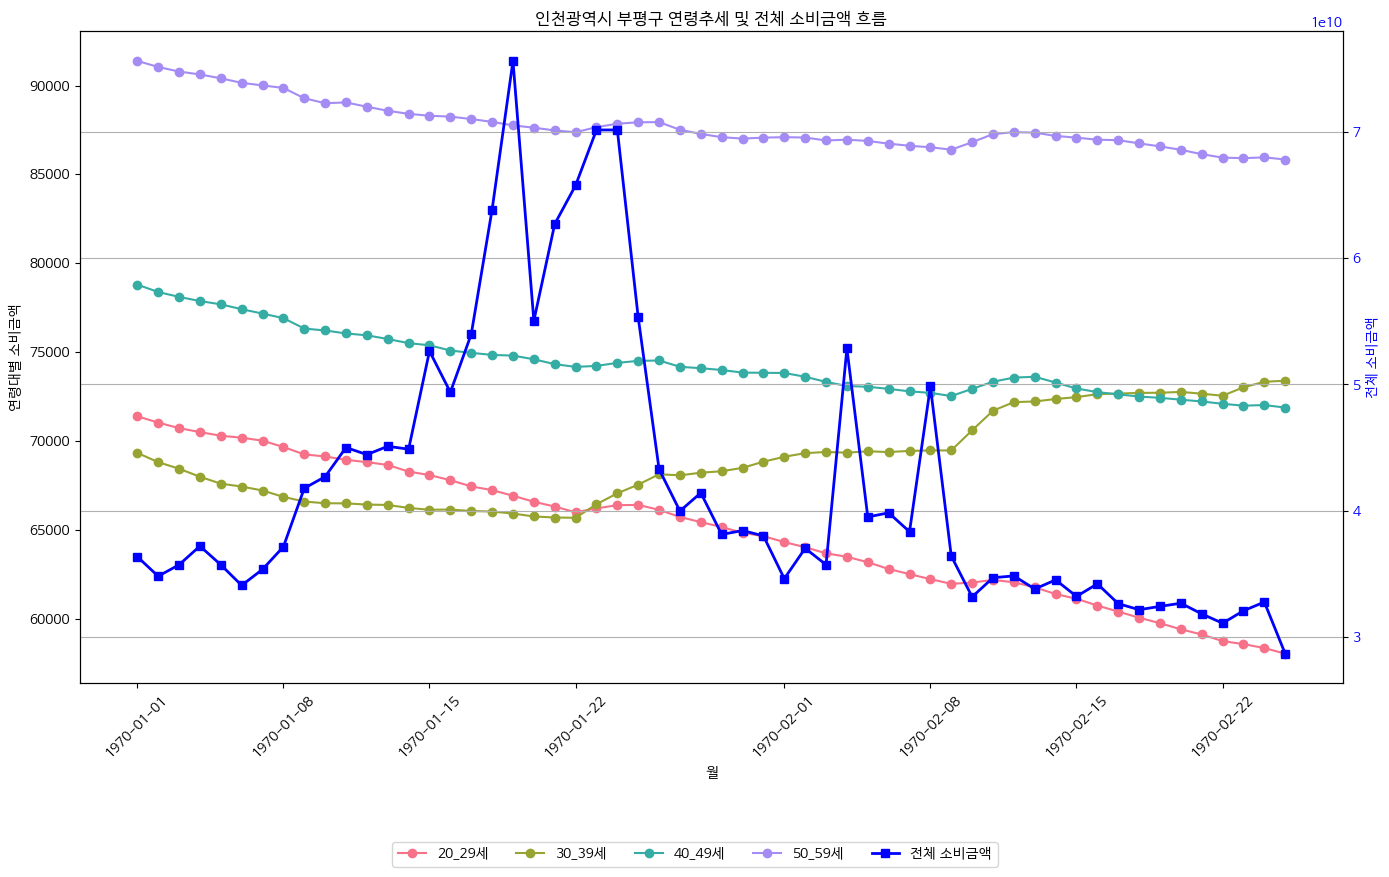

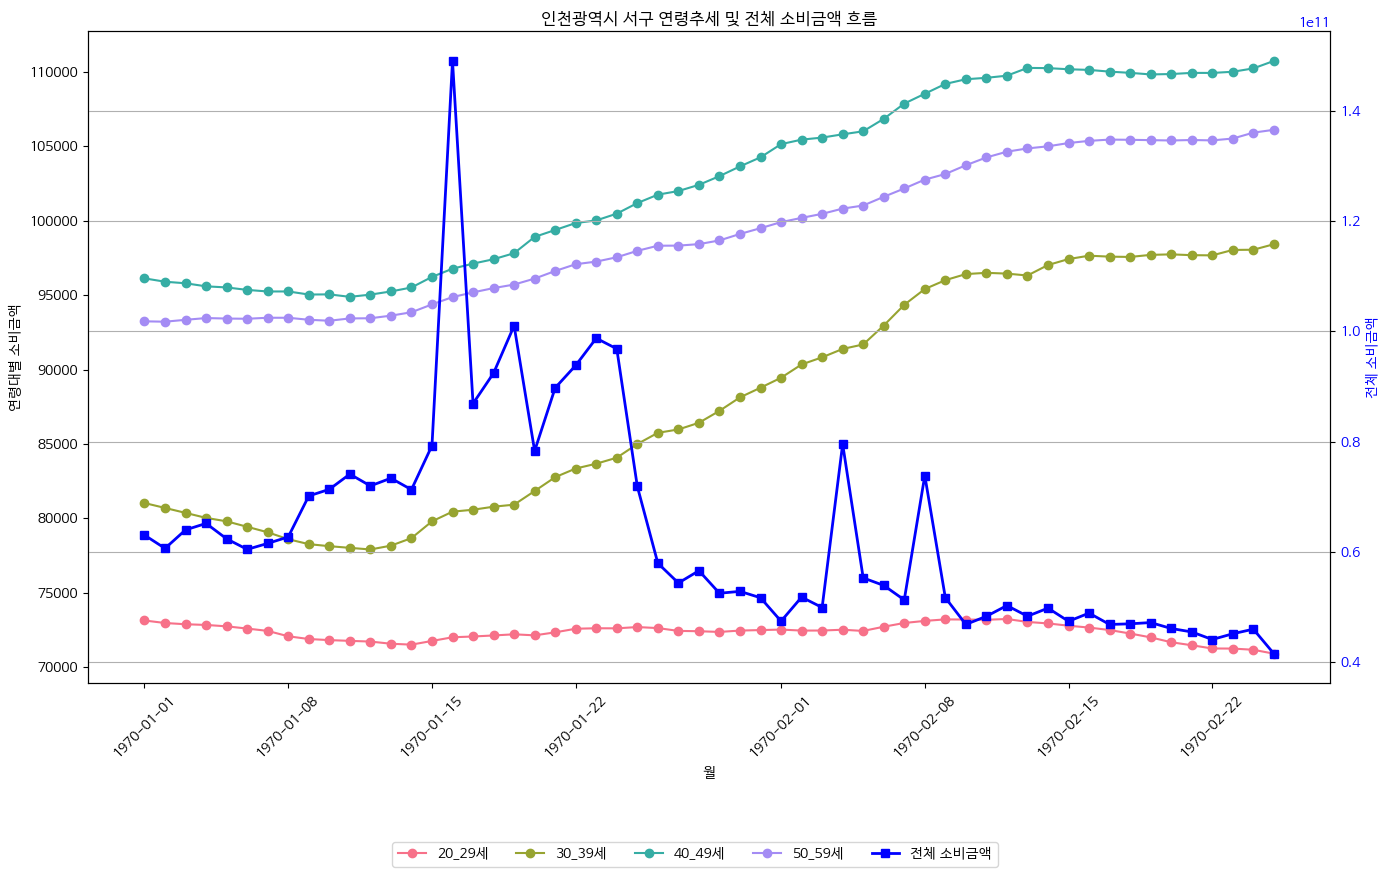

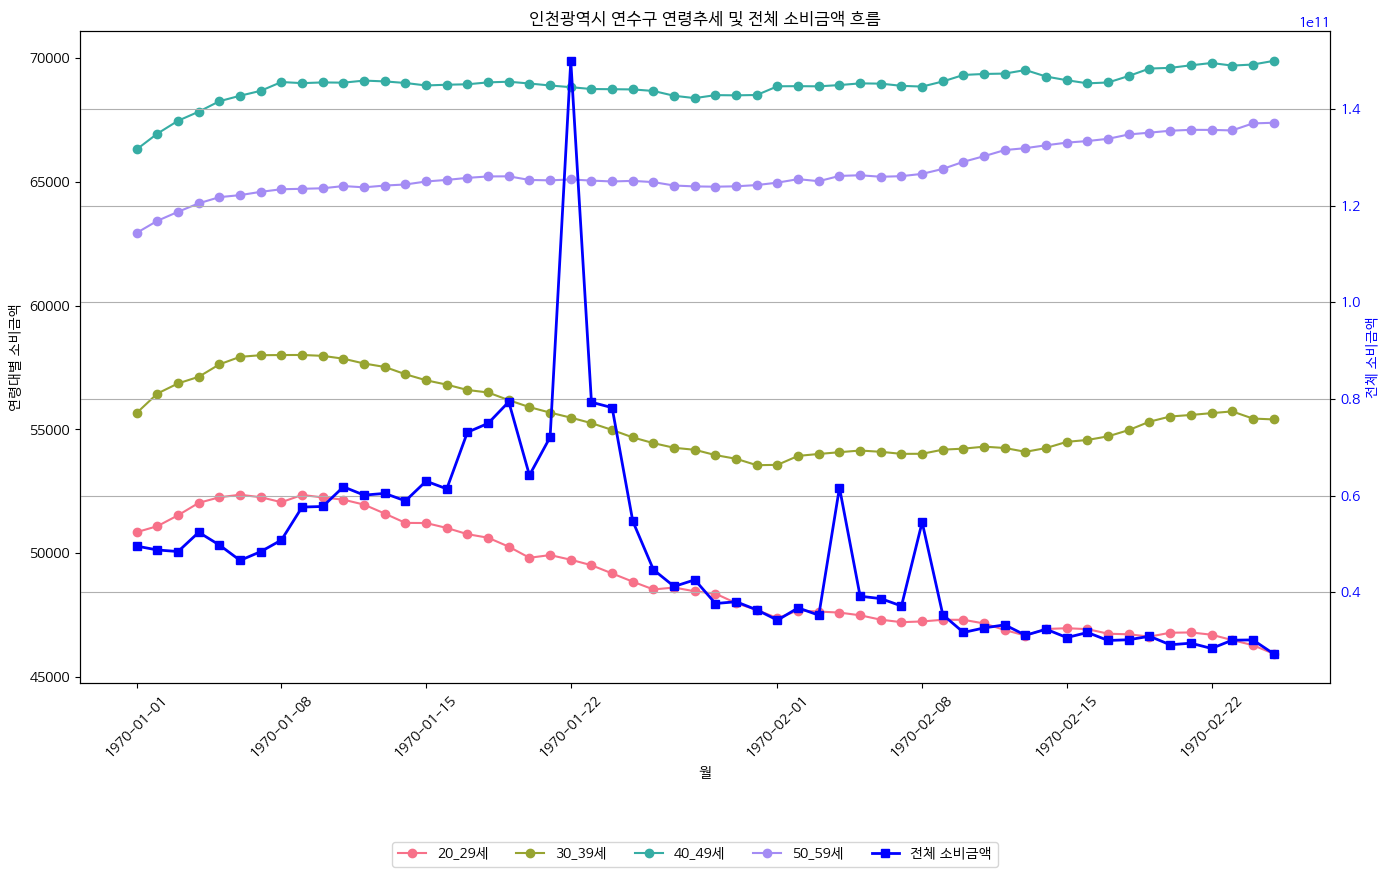

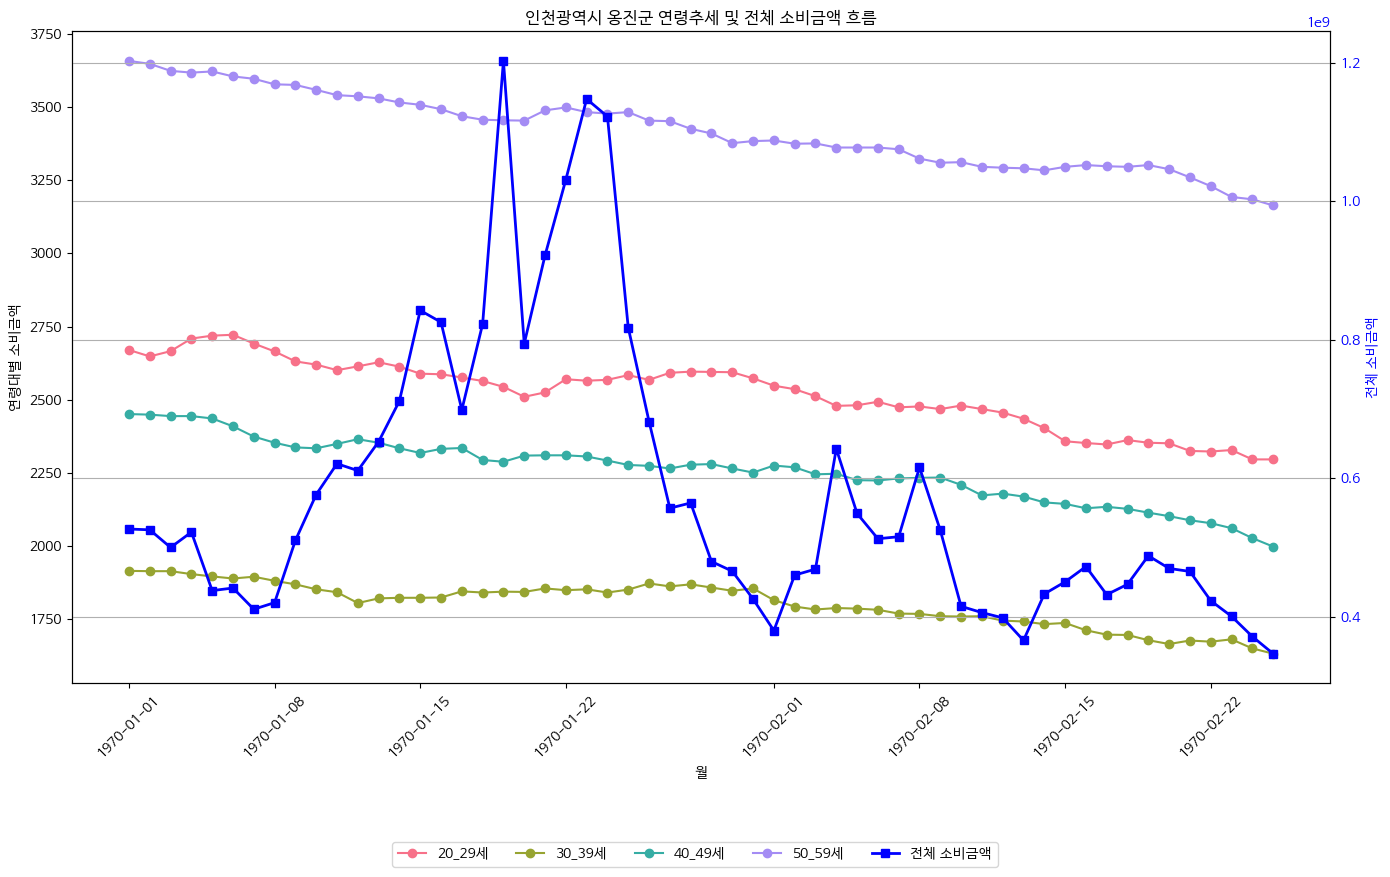

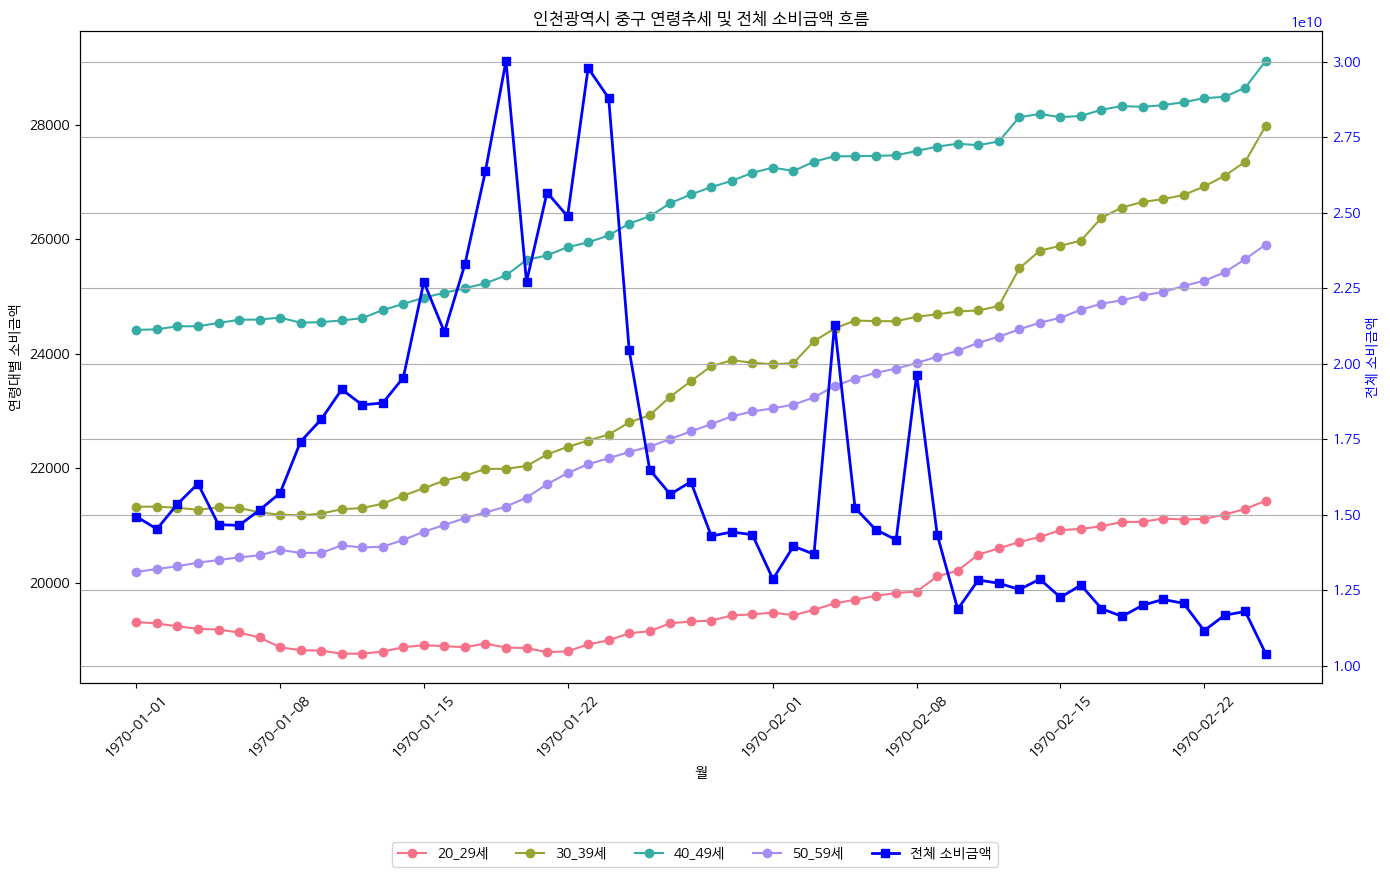

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import numpy as np

# 폰트 설정 (윈도우 기준)
font_location = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 데이터 불러오기
file_path = "C:/Users/user/Desktop/병합 데이터/인천e음_통합_월별 (1).csv"  # 실제 파일 경로
df = pd.read_csv(file_path, encoding='cp949')

df['월'] = pd.to_datetime(df['월'])
df['월'] = df['월'].dt.to_period('M').astype(str)


# 성별 연령대 합치기
df['20_29세'] = df[['남/20_29', '여/20_29']].sum(axis=1)
df['30_39세'] = df[['남/30_39', '여/30_39']].sum(axis=1)
df['40_49세'] = df[['남/40_49', '여/40_49']].sum(axis=1)
df['50_59세'] = df[['남/50_59', '여/50_59']].sum(axis=1)

# '지역' 컬럼에서 '인천광역시' 값 제거
df = df[df['지역'] != '인천광역시']


# 지역별로 데이터 처리
regions = df['지역'].unique()

for region in regions:
    # 해당 지역의 데이터 필터링
    region_data = df[df['지역'] == region][['월', '20_29세', '30_39세', '40_49세', '50_59세', '전체금액']]
    region_data = region_data.groupby('월')[['20_29세', '30_39세', '40_49세', '50_59세', '전체금액']].sum().reset_index()

    # 플롯 생성
    fig, ax1 = plt.subplots(figsize=(14, 8))

    # 연령대별 소비금액 변화 흐름 (선그래프)
    age_groups = ['20_29세', '30_39세', '40_49세', '50_59세']
    colors = sns.color_palette('husl', n_colors=len(age_groups))
    for i, age_group in enumerate(age_groups):
        ax1.plot(region_data['월'], region_data[age_group], marker='o', label=age_group, color=colors[i])

    ax1.set_xlabel('월')
    ax1.set_ylabel('연령대별 소비금액')
    ax1.tick_params(axis='y')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax1.tick_params(axis='x', rotation=45)

    # 전체금액 (선그래프, 이중 y축)
    ax2 = ax1.twinx()
    ax2.plot(region_data['월'], region_data['전체금액'], color='blue', marker='s', label='전체 소비금액', linewidth=2)
    ax2.set_ylabel('전체 소비금액', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # 제목 및 범례
    plt.title(f'{region} 연령추세 및 전체 소비금액 흐름')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

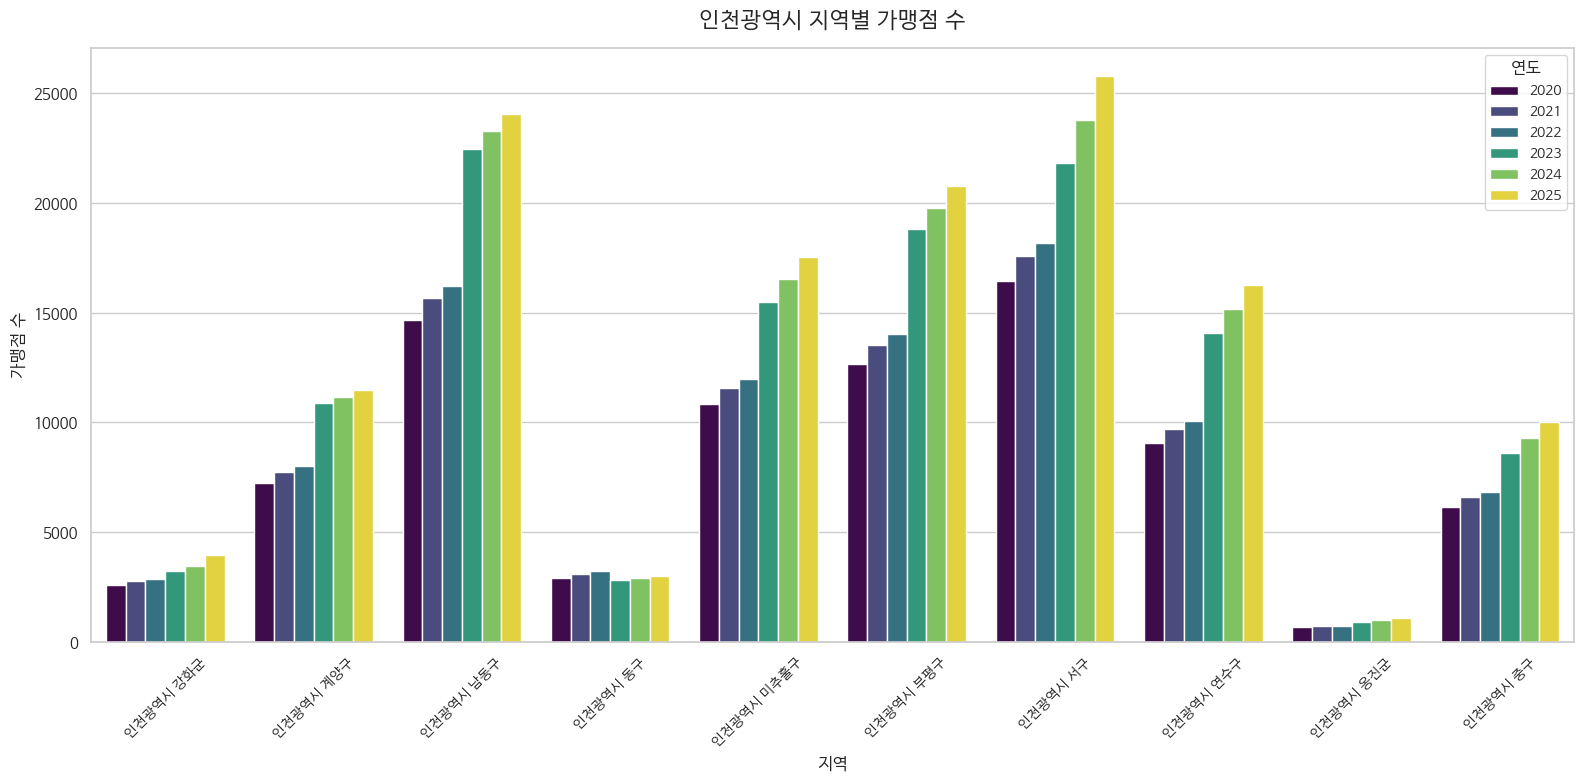

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns

# 폰트 설정 (윈도우 기준)
font_location = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

# 데이터 불러오기
file_path = "C:/Users/user/Desktop/병합 데이터/인천e음카드 가맹점수.csv"  # 실제 파일 경로
df = pd.read_csv(file_path)


# 지역별 연령대별 인구수 집계
pivot_df = df.pivot_table(values='가맹점수', index='지역', columns='일자', aggfunc='sum')

# 시각화
plt.figure(figsize=(16, 8))
sns.barplot(data=pivot_df.reset_index().melt(id_vars='지역', var_name='일자', value_name='가맹점수'), 
            x='지역', y='가맹점수', hue='일자', palette='viridis')
plt.title('인천광역시 지역별 가맹점 수', fontsize=16, pad=15)
plt.xlabel('지역', fontsize=12)
plt.ylabel('가맹점 수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='연도', title_fontsize=12, fontsize=10)
plt.tight_layout()
plt.show()

In [4]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 폰트 확인
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')  # 모든 TrueType 폰트 파일 찾기

# 폰트 목록 출력
for font in fonts:
    print(font)


C:\Windows\Fonts\taileb.ttf
C:\Windows\Fonts\LTYPE.TTF
C:\Windows\Fonts\STKAITI.TTF
C:\Windows\Fonts\STXIHEI.TTF
C:\Windows\Fonts\PERI____.TTF
C:\Windows\Fonts\FRADM.TTF
C:\Windows\Fonts\Roboto-Regular.ttf
C:\Windows\Fonts\COPRGTL.TTF
C:\Windows\Fonts\isoct3__.ttf
C:\Windows\Fonts\CALIFB.TTF
C:\Windows\Fonts\HTOWERT.TTF
C:\Windows\Fonts\BRLNSB.TTF
C:\Windows\Fonts\PRISTINA.TTF
C:\Windows\Fonts\HANBatang.ttf
C:\Windows\Fonts\swissc.ttf
C:\Windows\Fonts\NirmalaB.ttf
C:\Windows\Fonts\segoeuii.ttf
C:\Windows\Fonts\H2HDRM.TTF
C:\Windows\Fonts\calibrili.ttf
C:\Windows\Fonts\LSANSI.TTF
C:\Windows\Fonts\Artifakt Element Medium.ttf
C:\Windows\Fonts\trebucbd.ttf
C:\Windows\Fonts\romanc__.ttf
C:\Windows\Fonts\pala.ttf
C:\Windows\Fonts\GILLUBCD.TTF
C:\Windows\Fonts\Artifakt Element Hair Italic.ttf
C:\Windows\Fonts\GILC____.TTF
C:\Windows\Fonts\STXINGKA.TTF
C:\Windows\Fonts\POORICH.TTF
C:\Windows\Fonts\SIMLI.TTF
C:\Windows\Fonts\TCBI____.TTF
C:\Windows\Fonts\swscrpc.ttf
C:\Windows\Fonts\BRLNSDB.TTF

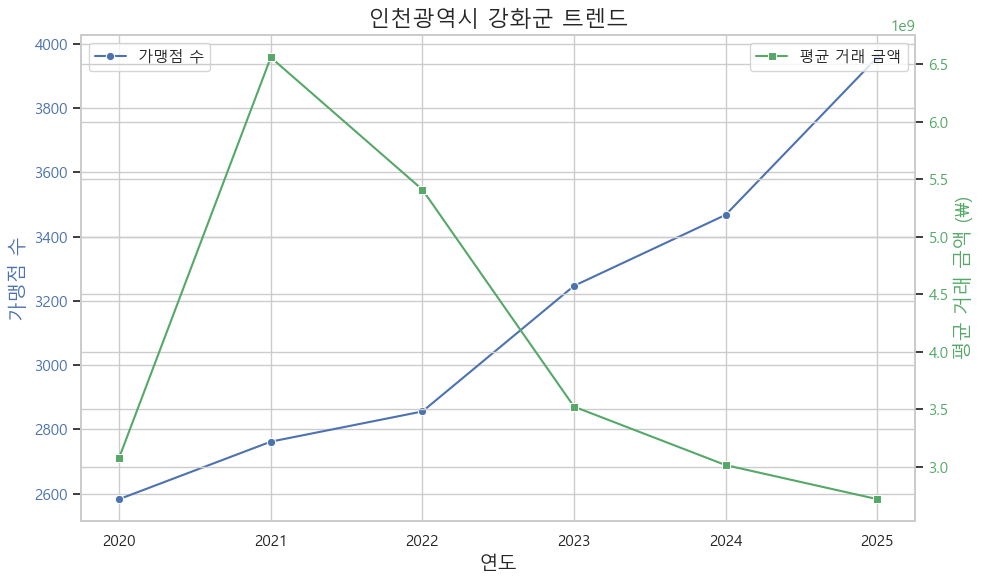

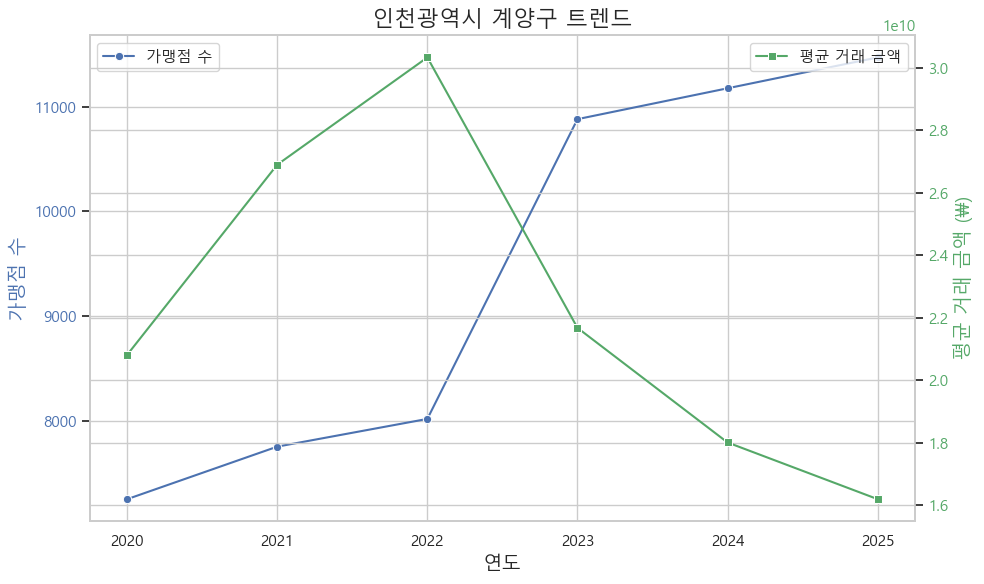

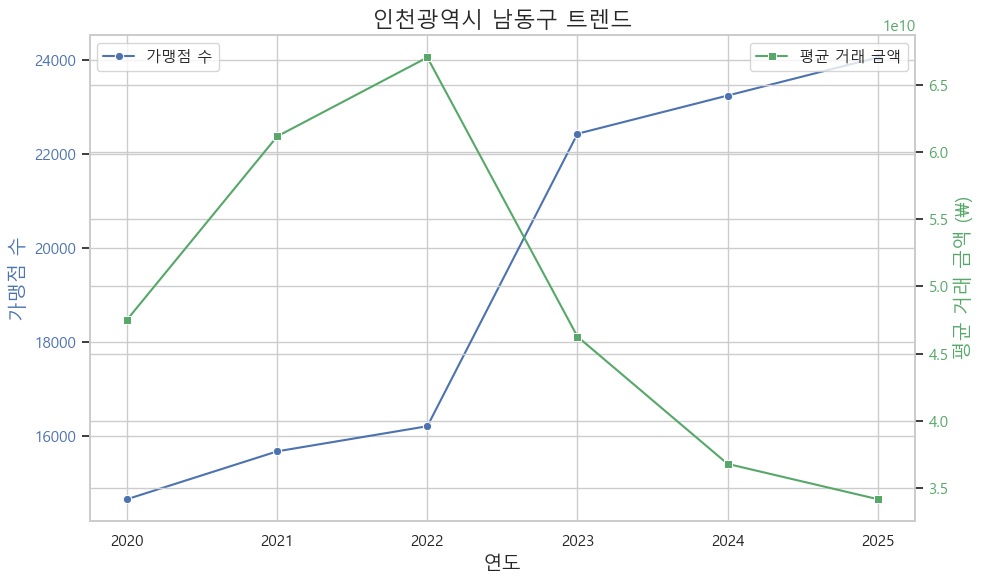

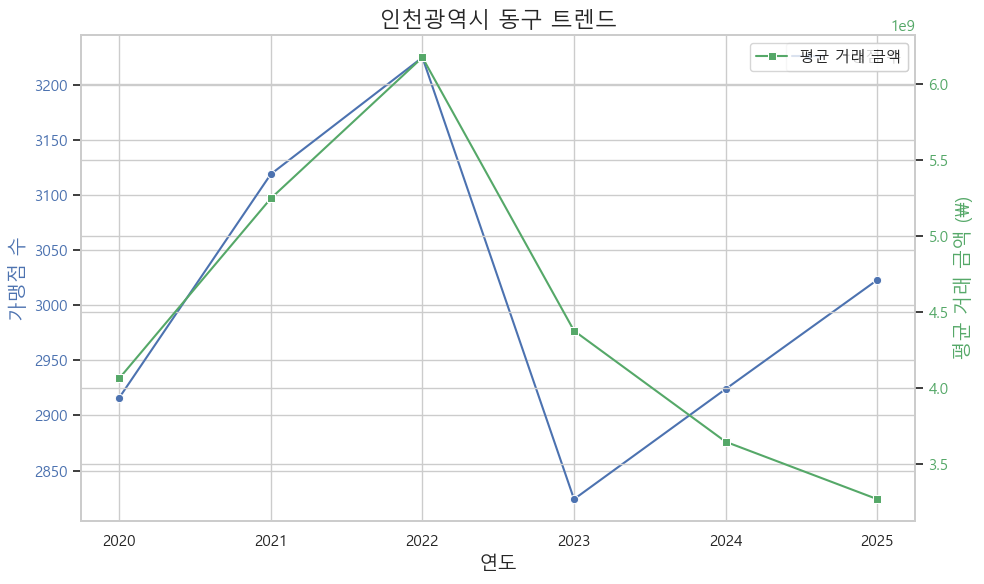

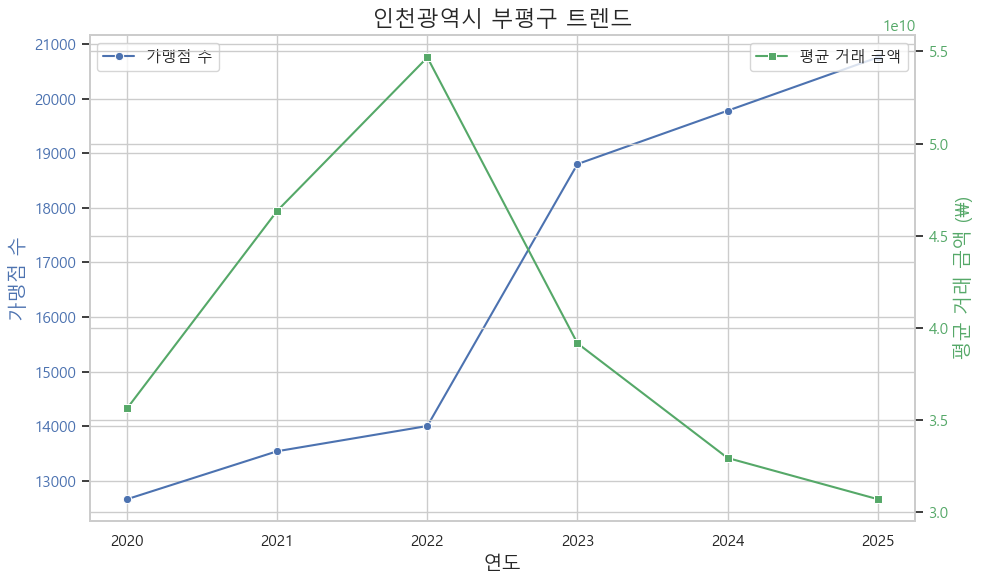

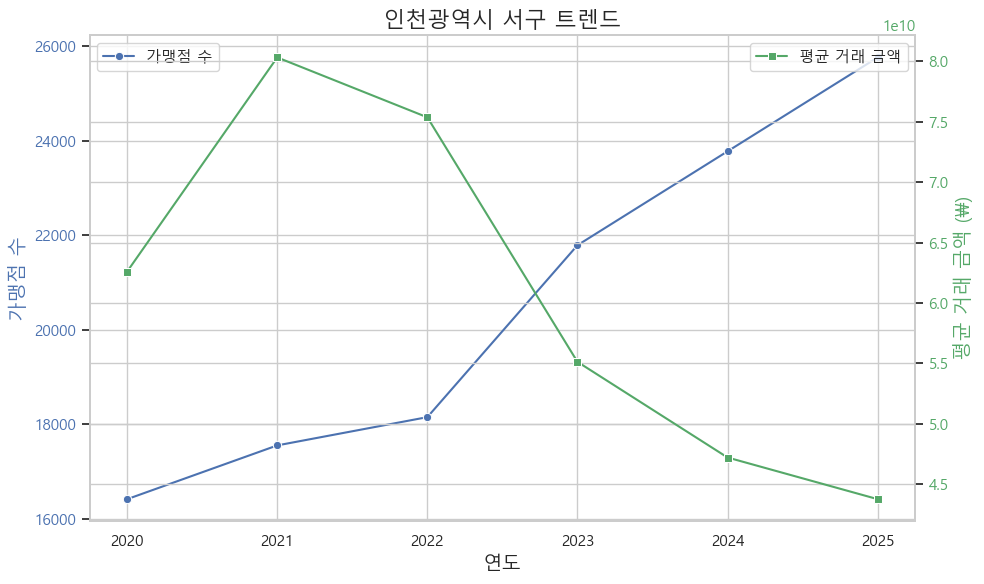

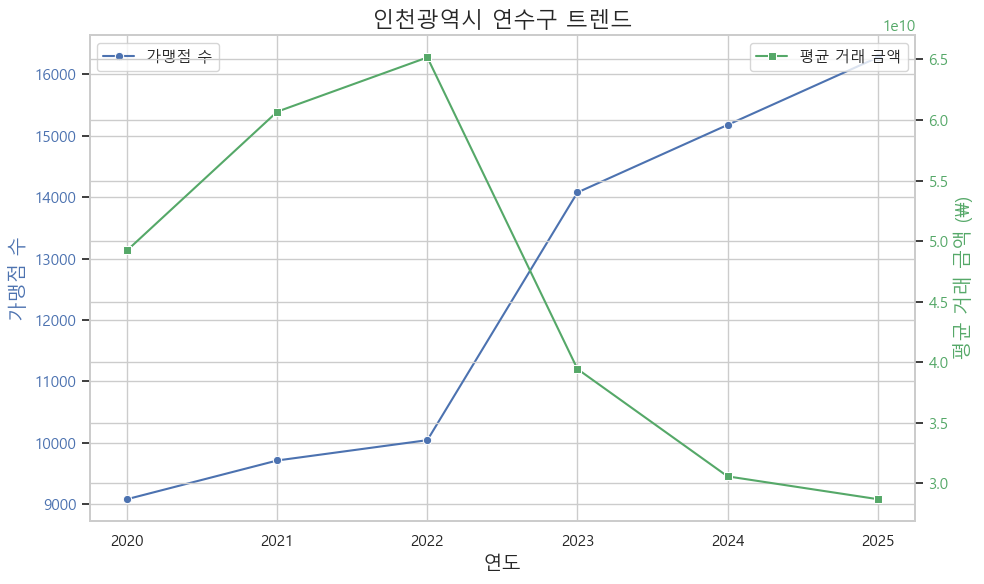

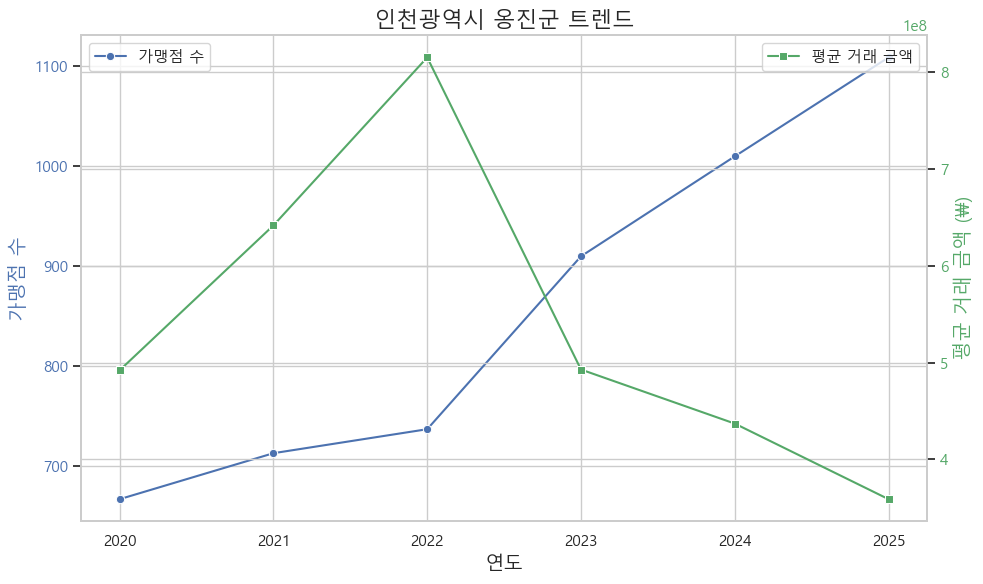

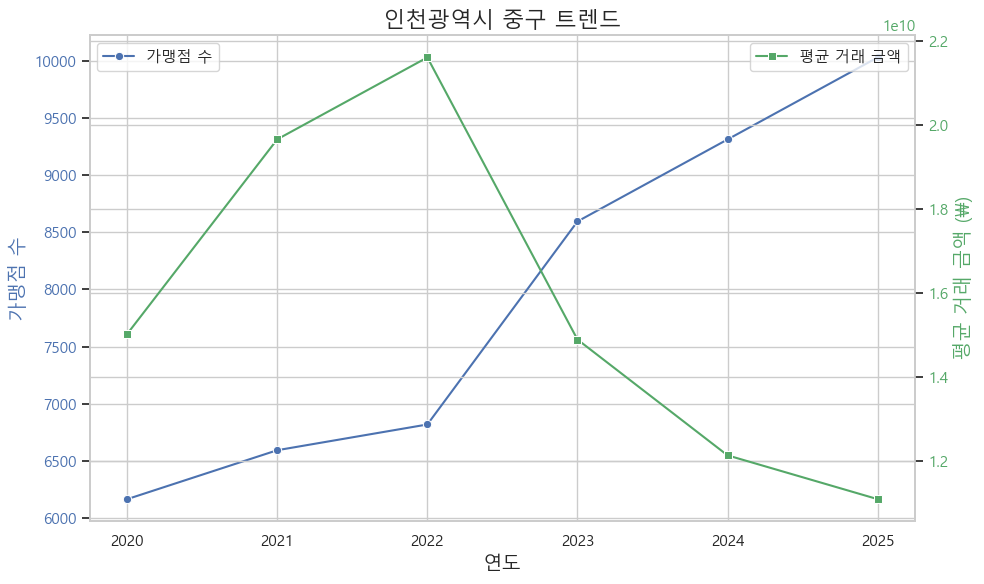

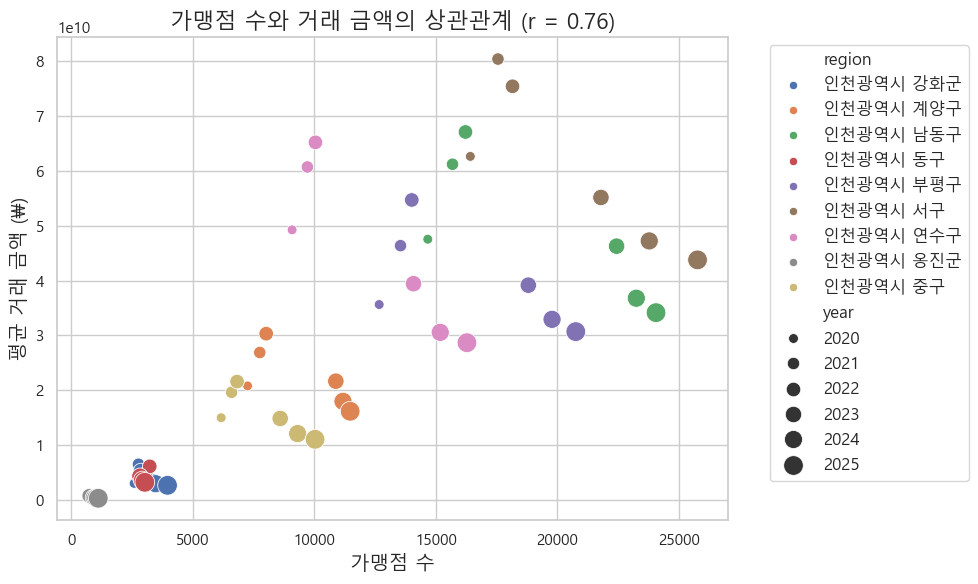

그래프 생성 완료.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
from scipy.stats import pearsonr
import os

# 데이터 로드 및 정리
try:
    stores_df = pd.read_csv("C:/Users/user/Desktop/병합 데이터/인천e음카드 가맹점수.csv", encoding='utf-8')
    trans_df = pd.read_csv("C:/Users/user/Desktop/병합 데이터/인천e음_통합_월별 (1).csv", encoding='cp949')

    # 가맹점 데이터 정리
    stores_df = stores_df.rename(columns={"일자": "year", "지역": "region", "가맹점수": "stores"})
    stores_df = stores_df[["year", "region", "stores"]].dropna()
    stores_df["year"] = stores_df["year"].astype(int)
    stores_df["stores"] = stores_df["stores"].astype(int)
    stores_df = stores_df[stores_df["stores"] > 0]

    # 거래 데이터 정리
    trans_df = trans_df.rename(columns={"월": "month", "지역": "region", "전체금액": "amount"})
    trans_df = trans_df[["month", "region", "amount"]].dropna()
    trans_df["year"] = trans_df["month"].str.split('-').str[0].astype(int)
    trans_df["amount"] = trans_df["amount"].astype(float)
    trans_df = trans_df[trans_df["amount"] > 0]

    # 연도와 지역별 평균 거래 금액 집계
    trans_agg = trans_df.groupby(["year", "region"])["amount"].mean().reset_index()
    trans_agg = trans_agg.rename(columns={"amount": "avg_amount"})

    # 데이터 병합
    merged_df = pd.merge(stores_df, trans_agg, on=["year", "region"], how="inner")
except Exception as e:
    print(f"데이터 로드 또는 처리 오류: {e}")
    merged_df = pd.DataFrame()

# 그래프 생성하기 (트렌드 및 상관분석)
if not merged_df.empty:
    sns.set(style="whitegrid")
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False    
    plt.rcParams["figure.dpi"] = 100

    # 지역별 트렌드 그래프
    for region in merged_df["region"].unique():
        region_data = merged_df[merged_df["region"] == region].sort_values("year")
        if region_data.empty:
            continue

        fig, ax1 = plt.subplots(figsize=(10, 6))

        # 첫 번째 축: 가맹점 수
        sns.lineplot(data=region_data, x="year", y="stores", marker='o', color='b', ax=ax1, label="가맹점 수")
        ax1.set_xlabel("연도", fontsize=14)
        ax1.set_ylabel("가맹점 수", color='b', fontsize=14)
        ax1.tick_params(axis='y', labelcolor='b')

        # 두 번째 축: 평균 거래 금액
        ax2 = ax1.twinx()
        sns.lineplot(data=region_data, x="year", y="avg_amount", marker='s', color='g', ax=ax2, label="평균 거래 금액")
        ax2.set_ylabel("평균 거래 금액 (₩)", color='g', fontsize=14)
        ax2.tick_params(axis='y', labelcolor='g')

        plt.title(f"{region} 트렌드", fontsize=16)
        fig.tight_layout()
        plt.show()

    # 상관관계 분석
    correlation, _ = pearsonr(merged_df["stores"], merged_df["avg_amount"])
    correlation = round(correlation, 2)

    # 상관 관계 산점도
    plt.rcParams['font.family'] ='Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] =False
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=merged_df, x="stores", y="avg_amount", hue="region", size="year", sizes=(50, 200))
    plt.xlabel("가맹점 수", fontsize=14)
    plt.ylabel("평균 거래 금액 (₩)", fontsize=14)
    plt.title(f"가맹점 수와 거래 금액의 상관관계 (r = {correlation})", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("그래프 생성 완료.")
else:
    print("데이터가 없습니다. 그래프를 생성할 수 없습니다.")
